In [1]:
from soma import aims 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import os, pickle

In [2]:
subjects = pd.read_csv('../../DerivedData/replication_cohort_all_subjects_current.csv', 
                                         names=['subject_id', 'session_id', 'template'])

def read_texture(path):
    text_f = aims.read(path)
    text_a = np.array(text_f)[0]
    
    return text_a

### Getting global diffusion metric across the brain (excluding cingulate area)
median!

In [3]:
df = pd.DataFrame()
for i, row in subjects.iterrows():   
    if i % 100 == 0 :
        print('Running {}/{}'.format(i,len(subjects)))
        
    segmentation = 64
    for hemi in ['left', 'right']:
        
        ## use this to get location of cingulate
        iDIR = '../../DerivedData/subjects/sub-{}/ses-{}'.format(row.subject_id, row.session_id)        
        iFile = 'sub-{}_ses-{}_hemi-{}_pathKmeans_{}.label.gii'.format(row.subject_id, row.session_id, hemi, segmentation )
        iSeg = os.path.join(iDIR, iFile)
        
        if os.path.isfile(iSeg):
            segm = read_texture(iSeg)
            cing_label = np.unique(segm)[-1]
        
            for metric in ['FA', 'L1', 'RD', 'MD']:
                iMetric = os.path.join(iDIR, 'sub-{}_ses-{}_{}_texture_{}_majority.gii'.format(row.subject_id, row.session_id, 
                                                                                                   hemi, metric))
                if os.path.isfile(iMetric):
                    met = read_texture(iMetric)
                
                    df.loc[i, 'subject_id'] = row.subject_id
                    df.loc[i, 'session_id'] = row.session_id
                    #df.loc[i, '{}_{}'.format(hemi, metric)] = np.mean(met[segm!=cing_label].ravel())
                    df.loc[i, '{}_{}'.format(hemi, metric)] = np.median(met[segm!=cing_label].ravel())
                
df['session_id'] = df['session_id'].astype(int)

Running 0/370
Running 100/370
Running 200/370
Running 300/370


In [4]:
df.to_csv('../../DerivedData/extracted_metrics/global_cortical_diffusion_metrics_median.csv')

# df = pd.read_csv('../../DerivedData/extracted_metrics/global_cortical_diffusion_metrics.csv')

In [10]:
df = pd.DataFrame()
for i, row in subjects.iterrows():   
    if i % 100 == 0 :
        print('Running {}/{}'.format(i,len(subjects)))
        
    segmentation = 64
    for hemi in ['left', 'right']:
        
        ## use this to get location of cingulate
        iDIR = '../../DerivedData/subjects/sub-{}/ses-{}'.format(row.subject_id, row.session_id)        
        iFile = 'sub-{}_ses-{}_hemi-{}_pathKmeans_{}.label.gii'.format(row.subject_id, row.session_id, hemi, segmentation )
        iSeg = os.path.join(iDIR, iFile)
        
        if os.path.isfile(iSeg):
            segm = read_texture(iSeg)
            cing_label = np.unique(segm)[-1]
        
            for metric in ['FA']:
                iMetric = os.path.join(iDIR, 'sub-{}_ses-{}_{}_texture_{}.gii'.format(row.subject_id, row.session_id, 
                                                                                                   hemi, metric))
                if os.path.isfile(iMetric):
                    met = read_texture(iMetric)
                
                    df.loc[i, 'subject_id'] = row.subject_id
                    df.loc[i, 'session_id'] = row.session_id
                    #df.loc[i, '{}_{}'.format(hemi, metric)] = np.mean(met[segm!=cing_label].ravel())
                    df.loc[i, '{}_{}'.format(hemi, metric)] = np.median(met[segm!=cing_label].ravel())
                
df['session_id'] = df['session_id'].astype(int)
df.to_csv('../../DerivedData/extracted_metrics/global_cortical_FA_metrics_median_minAD.csv')

Running 0/370
Running 100/370
Running 200/370
Running 300/370


### Setting up metric / random parcel diffusion extraction  
#### in random parcellation, the largest label is cingulate area and should be removed

In [44]:

for segmentation in [64]:#, 128, 256, 512]:
    df = pd.DataFrame()
    for i, row in subjects.iterrows():   
        if i % 100 == 0 :
            print('Running {}/{}'.format(i,len(subjects)))
        for hemi in ['left', 'right']:
            
            iDIR = '../../DerivedData/subjects/sub-{}/ses-{}'.format(row.subject_id, row.session_id)        
            iFile = 'sub-{}_ses-{}_hemi-{}_pathKmeans_{}.label.gii'.format(row.subject_id, row.session_id, hemi, segmentation )
        
            iSeg = os.path.join(iDIR, iFile)
              
            if os.path.isfile(iSeg):
                
                segm = read_texture(iSeg)
                labels = np.unique(segm)[:-1]   

                for metric in ['FA', 'L1', 'RD', 'MD']:
                    
                    iMetric = os.path.join(iDIR, 'sub-{}_ses-{}_{}_texture_{}_majority.gii'.format(row.subject_id, row.session_id, 
                                                                                                   hemi, metric))
                    if os.path.isfile(iMetric):
                        met = read_texture(iMetric)
                
                        df.loc[i, 'subject_id'] = row.subject_id
                        df.loc[i, 'session_id'] = row.session_id
                
                
                        for label in labels:
                            df.loc[i, '{}_{}_{}'.format(hemi, label, metric)] = np.mean(met[segm==label].ravel()) 
                    else: 
                        print(row.subject_id, row.session_id, '{} file missing'.format(metric))
            else:
                print(row.subject_id, row.session_id, 'segmentation missing')
                
    df['session_id'] = df['session_id'].astype(int)
    
    df.to_csv('../../DerivedData/extracted_metrics/random_parcellation_{}_diffusion_metric.csv'.format(segmentation * 2))

Running 0/376


KeyboardInterrupt: 

In [9]:
for segmentation in [64, 128, 256, 512]:
    df = pd.DataFrame()
    for i, row in subjects.iterrows():   
        if i % 100 == 0 :
            print('Running {}/{}'.format(i,len(subjects)))
        for hemi in ['left', 'right']:
            
            iDIR = '../../DerivedData/subjects/sub-{}/ses-{}'.format(row.subject_id, row.session_id)        
            iFile = 'sub-{}_ses-{}_hemi-{}_pathKmeans_{}.label.gii'.format(row.subject_id, row.session_id, hemi, segmentation )
        
            iSeg = os.path.join(iDIR, iFile)
              
            if os.path.isfile(iSeg):
                
                segm = read_texture(iSeg)
                labels = np.unique(segm)[:-1]   

                for metric in ['FA']:
                    
                    iMetric = os.path.join(iDIR, 'sub-{}_ses-{}_{}_texture_{}.gii'.format(row.subject_id, row.session_id, 
                                                                                                   hemi, metric))
                    if os.path.isfile(iMetric):
                        met = read_texture(iMetric)
                
                        df.loc[i, 'subject_id'] = row.subject_id
                        df.loc[i, 'session_id'] = row.session_id
                
                
                        for label in labels:
                            df.loc[i, '{}_{}_{}'.format(hemi, label, metric)] = np.mean(met[segm==label].ravel()) 
                    else: 
                        print(row.subject_id, row.session_id, '{} file missing'.format(metric))
            else:
                print(row.subject_id, row.session_id, 'segmentation missing')
                
    df['session_id'] = df['session_id'].astype(int)
    
    df.to_csv('../../DerivedData/extracted_metrics/random_parcellation_{}_FA_median_minAD.csv'.format(segmentation * 2))

Running 0/370
Running 100/370
Running 200/370
Running 300/370
Running 0/370
Running 100/370
Running 200/370
Running 300/370
Running 0/370
Running 100/370
Running 200/370
Running 300/370
Running 0/370
Running 100/370
Running 200/370
Running 300/370


### Setting up metric / segmented parcel diffusion extraction
median vs mean

In [3]:
missing = []

df = pd.DataFrame()
for i, row in subjects.iterrows():   
    if i % 100 == 0 :
        print('Running {}/{}'.format(i,len(subjects)))
    
    for hemi in ['left', 'right']:
        iDIR = '../../DerivedData/subjects/sub-{}/ses-{}'.format(row.subject_id, row.session_id)        
        iFile = 'sub-{}_ses-{}_neoAtlas_corrected_{}.gii'.format(row.subject_id, row.session_id, hemi )
        
        iSeg = os.path.join(iDIR, iFile)
        if not os.path.isfile(iSeg):
    
            #print(row.subject_id, hemi , 'MISSING')
            missing.append(row.subject_id)

Running 0/370
Running 100/370
Running 200/370
Running 300/370


In [6]:
#sanity check
with open('../../DerivedData/cohorts_subjects_list_python2.pickle', 'rb') as handle:
    cohorts = pickle.load(handle)

[miss for miss in missing if miss in cohorts['A'] ]

[]

In [7]:
df = pd.DataFrame()
for i, row in subjects.iterrows():   
    if i % 100 == 0 :
        print('Running {}/{}'.format(i,len(subjects)))
    
    for hemi in ['left', 'right']:
        iDIR = '../../DerivedData/subjects/sub-{}/ses-{}'.format(row.subject_id, row.session_id)        
        iFile = 'sub-{}_ses-{}_neoAtlas_corrected_{}.gii'.format(row.subject_id, row.session_id, hemi )
        
        iSeg = os.path.join(iDIR, iFile)
        if os.path.isfile(iSeg):
            segm = read_texture(iSeg)
            ## first one is cingular pole so remove
            labels = np.unique(segm)[1:]   
            
            for metric in ['FA', 'L1', 'RD', 'MD']:
                    
                iMetric = os.path.join(iDIR, 'sub-{}_ses-{}_{}_texture_{}_majority.gii'.format(row.subject_id, row.session_id, 
                                                                                                   hemi, metric))
                if os.path.isfile(iMetric):
                    met = read_texture(iMetric)
                
                    df.loc[i, 'subject_id'] = row.subject_id
                    df.loc[i, 'session_id'] = row.session_id
                
                
                    for label in labels:
                        #df.loc[i, '{}_{}_{}'.format(hemi, int(label), metric)] = np.mean(met[segm==label].ravel()) 
                        df.loc[i, '{}_{}_{}'.format(hemi, int(label), metric)] = np.median(met[segm==label].ravel()) 
                else: 
                    print(row.subject_id, row.session_id, '{} file missing'.format(metric))
        else:
            print(row.subject_id, row.session_id, 'segmentation missing')
                
    df['session_id'] = df['session_id'].astype(int)
    
df.to_csv('../../DerivedData/extracted_metrics/neonat_segmentation_diffusion_metric_median.csv')
    

Running 0/370
('CC00100XX01', 35000, 'segmentation missing')
('CC00100XX01', 35000, 'segmentation missing')
('CC00109XX10', 36901, 'segmentation missing')
('CC00109XX10', 36901, 'segmentation missing')
('CC00139XX16', 49101, 'segmentation missing')
('CC00139XX16', 49101, 'segmentation missing')
('CC00154XX06', 50700, 'segmentation missing')
('CC00154XX06', 50700, 'segmentation missing')
('CC00171XX07', 56300, 'segmentation missing')
('CC00171XX07', 56300, 'segmentation missing')
('CC00189XX17', 62301, 'segmentation missing')
('CC00189XX17', 62301, 'segmentation missing')
('CC00223XX09', 75900, 'segmentation missing')
('CC00223XX09', 75900, 'segmentation missing')
Running 100/370
('CC00399XX21', 123400, 'segmentation missing')
('CC00399XX21', 123400, 'segmentation missing')
Running 200/370
('CC00538XX19', 157200, 'segmentation missing')
('CC00538XX19', 157200, 'segmentation missing')
('CC00566XX14', 164500, 'segmentation missing')
('CC00566XX14', 164500, 'segmentation missing')
('CC0076

In [4]:
df = pd.DataFrame()
for i, row in subjects.iterrows():   
    if i % 100 == 0 :
        print('Running {}/{}'.format(i,len(subjects)))
    
    for hemi in ['left', 'right']:
        iDIR = '../../DerivedData/subjects/sub-{}/ses-{}'.format(row.subject_id, row.session_id)        
        iFile = 'sub-{}_ses-{}_neoAtlas_corrected_{}.gii'.format(row.subject_id, row.session_id, hemi )
        
        iSeg = os.path.join(iDIR, iFile)
        if os.path.isfile(iSeg):
            segm = read_texture(iSeg)
            ## first one is cingular pole so remove
            labels = np.unique(segm)[1:]   
            
            for metric in ['FA']:
                    
                iMetric = os.path.join(iDIR, 'sub-{}_ses-{}_{}_texture_{}.gii'.format(row.subject_id, row.session_id, 
                                                                                                   hemi, metric))
                if os.path.isfile(iMetric):
                    met = read_texture(iMetric)
                
                    df.loc[i, 'subject_id'] = row.subject_id
                    df.loc[i, 'session_id'] = row.session_id
                
                
                    for label in labels:
                        #df.loc[i, '{}_{}_{}'.format(hemi, int(label), metric)] = np.mean(met[segm==label].ravel()) 
                        df.loc[i, '{}_{}_{}'.format(hemi, int(label), metric)] = np.median(met[segm==label].ravel()) 
                else: 
                    print(row.subject_id, row.session_id, '{} file missing'.format(metric))
        else:
            print(row.subject_id, row.session_id, 'segmentation missing')
                
    df['session_id'] = df['session_id'].astype(int)
    
df.to_csv('../../DerivedData/extracted_metrics/neonat_segmentation_FA_median_minAD.csv')
    

Running 0/370
('CC00100XX01', 35000, 'segmentation missing')
('CC00100XX01', 35000, 'segmentation missing')
('CC00109XX10', 36901, 'segmentation missing')
('CC00109XX10', 36901, 'segmentation missing')
('CC00139XX16', 49101, 'segmentation missing')
('CC00139XX16', 49101, 'segmentation missing')
('CC00154XX06', 50700, 'segmentation missing')
('CC00154XX06', 50700, 'segmentation missing')
('CC00171XX07', 56300, 'segmentation missing')
('CC00171XX07', 56300, 'segmentation missing')
('CC00189XX17', 62301, 'segmentation missing')
('CC00189XX17', 62301, 'segmentation missing')
('CC00223XX09', 75900, 'segmentation missing')
('CC00223XX09', 75900, 'segmentation missing')
Running 100/370
('CC00399XX21', 123400, 'segmentation missing')
('CC00399XX21', 123400, 'segmentation missing')
Running 200/370
('CC00538XX19', 157200, 'segmentation missing')
('CC00538XX19', 157200, 'segmentation missing')
('CC00566XX14', 164500, 'segmentation missing')
('CC00566XX14', 164500, 'segmentation missing')
('CC0076

In [7]:
cols = [col for col in df.columns if 'FA' in col]
df = df[df.subject_id.isin(cohorts['A'])]
scheme = pd.read_csv('../../SourceData/atlas_labelling_scheme.csv')

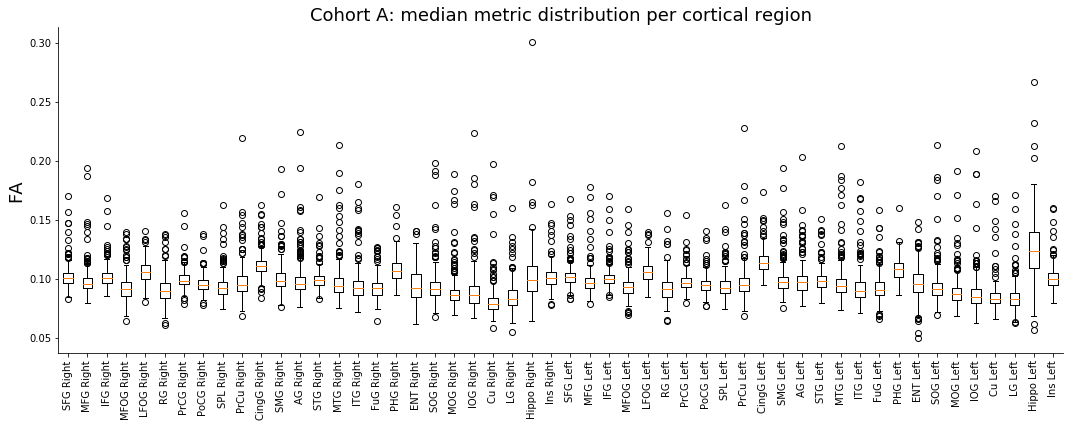

In [8]:
lbs = [name.split('_')[1] for name in cols]
names = [scheme[scheme.Label == int(l)]['Abbreviation'].values[0] + ' ' +  scheme[scheme.Label == int(l)]['Hemisphere'].values[0]for l in lbs]

fig, ax = plt.subplots( figsize=(18,6))

plt.boxplot( [df[~df[col].isna()][col].values for col in cols])
plt.xticks(range(1,len(cols)+1),names, rotation=90 )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.set_facecolor("white")

plt.ylabel('FA', fontsize=18)
plt.title('Cohort A: median metric distribution per cortical region', fontsize=18)

#plt.savefig('../../Results/figures/cohort_descriptions/diffusion_metrics_distribution_cohortA_neonat_segm_median.png', dpi=500)
plt.savefig('../../Results/figures/cohort_descriptions/FA_distribution_cohortA_neonat_segm_median.png', dpi=500)
plt.show()